<a href="https://colab.research.google.com/github/averma12/Deep-Learning/blob/master/MNIST_ResBlocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install fastai

    100% |████████████████████████████████| 153kB 10.3MB/s 
    100% |████████████████████████████████| 112kB 25.5MB/s 
    100% |████████████████████████████████| 591.8MB 32kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61cd8000 @  0x7f73c35b42a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 15.8MB/s 
  Running setup.py bdist_wheel for nvidia-ml-py3 ... - done
  Stored in directory: /root/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
  Running setup.py bdist_wheel for bottleneck ... - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/f2/bf/ec/e0f39aa27001525ad455139ee57ec7d0776fe074dfd78c97e4
Successfully built nvidia-ml-py3 bottleneck
torchvision 0

In [0]:
from fastai.vision import *

In [0]:
path = untar_data(URLs.MNIST)

In [7]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/training'),
 PosixPath('/root/.fastai/data/mnist_png/testing')]

In [0]:
il = ImageItemList.from_folder(path, convert_mode='L')

In [9]:
il.items[0]

PosixPath('/root/.fastai/data/mnist_png/training/5/50782.png')

In [0]:
defaults.cmap='binary'

In [11]:
il

ImageItemList (70000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /root/.fastai/data/mnist_png

In [12]:
id(il.from_folder)

140158022352072

In [13]:
id(ImageItemList)

89858520

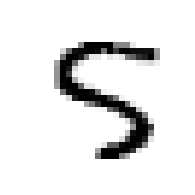

In [14]:
il[0].show()

In [0]:
sd = il.split_by_folder(train='training', valid='testing')

In [16]:
sd

ItemLists;

Train: ImageItemList (60000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /root/.fastai/data/mnist_png;

Valid: ImageItemList (10000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /root/.fastai/data/mnist_png;

Test: None

In [17]:
(path/'training').ls()

[PosixPath('/root/.fastai/data/mnist_png/training/5'),
 PosixPath('/root/.fastai/data/mnist_png/training/8'),
 PosixPath('/root/.fastai/data/mnist_png/training/0'),
 PosixPath('/root/.fastai/data/mnist_png/training/3'),
 PosixPath('/root/.fastai/data/mnist_png/training/1'),
 PosixPath('/root/.fastai/data/mnist_png/training/6'),
 PosixPath('/root/.fastai/data/mnist_png/training/9'),
 PosixPath('/root/.fastai/data/mnist_png/training/4'),
 PosixPath('/root/.fastai/data/mnist_png/training/2'),
 PosixPath('/root/.fastai/data/mnist_png/training/7')]

In [19]:
type(path/'training')

pathlib.PosixPath

In [0]:
ll = sd.label_from_folder()

In [39]:
ll

LabelLists;

Train: LabelList
y: CategoryList (60000 items)
[Category 5, Category 5, Category 5, Category 5, Category 5]...
Path: /root/.fastai/data/mnist_png
x: ImageItemList (60000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /root/.fastai/data/mnist_png;

Valid: LabelList
y: CategoryList (10000 items)
[Category 5, Category 5, Category 5, Category 5, Category 5]...
Path: /root/.fastai/data/mnist_png
x: ImageItemList (10000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /root/.fastai/data/mnist_png;

Test: None

In [0]:
??conv_layer

**How to unpack a list in python using  * **
The below code shows how to unpack a list and assign to another variable

In [0]:
a = [1,2,3,4,5,6]

In [0]:
b = [*a]

In [26]:
b

[1, 2, 3, 4, 5, 6]

In [0]:
x,y = ll.train[0]

5 torch.Size([1, 28, 28])


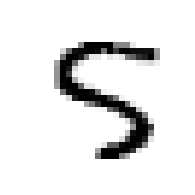

In [41]:
x.show()
print(y,x.shape)


In [0]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])

In [0]:
ll = ll.transform(tfms)

In [0]:
bs = 128

In [45]:
%time data = ll.databunch(bs=bs).normalize()

CPU times: user 98.1 ms, sys: 57.9 ms, total: 156 ms
Wall time: 363 ms


In [0]:
x,y = data.train_ds[0]

5


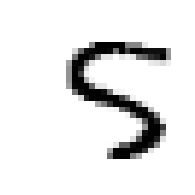

In [47]:
x.show()
print(y)

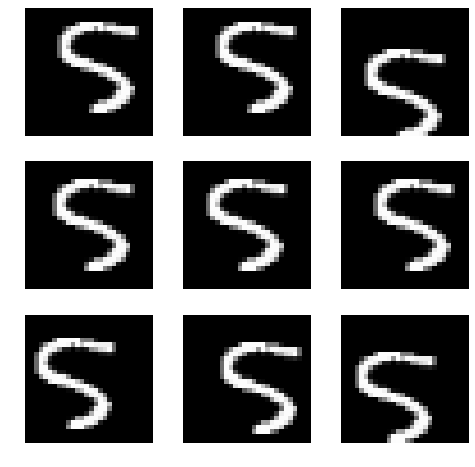

In [48]:
def _plot(i,j,ax): data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [49]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

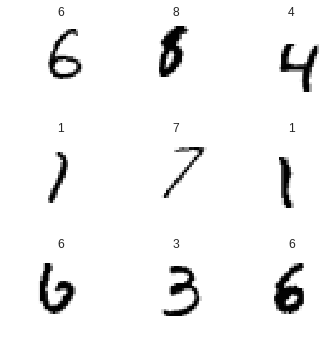

In [50]:
data.show_batch(rows=3, figsize=(5,5))

**Now onto CNN with batchNorm using a Residual Block **

In [0]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [0]:
conv_abhinav = conv_layer(1,8)

In [53]:
conv_abhinav

Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): ReLU(inplace)
  (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [0]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

In [0]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [0]:
model = nn.Sequential(
    conv2(1, 8),
    res_block(8),
    conv2(8, 16),
    res_block(16),
    conv2(16, 32),
    res_block(32),
    conv2(32, 16),
    res_block(16),
    conv2(16, 10),
    Flatten()
)

In [58]:
%time learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

CPU times: user 10.3 ms, sys: 2.66 ms, total: 12.9 ms
Wall time: 16.8 ms


In [59]:
%time learn.lr_find(end_lr=100)

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
CPU times: user 3.66 s, sys: 660 ms, total: 4.32 s
Wall time: 8.4 s


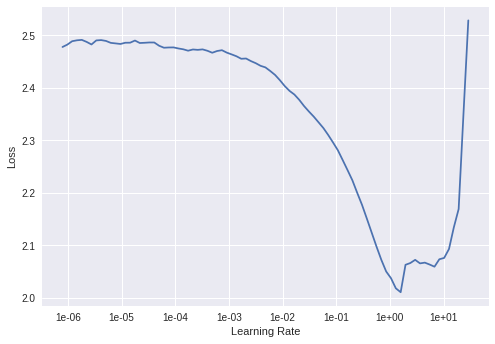

In [61]:
learn.recorder.plot()

In [62]:
%time learn.fit_one_cycle(12, max_lr=0.05)

epoch,train_loss,valid_loss,accuracy
1,0.243958,0.146635,0.959500
2,0.127918,0.402470,0.882400
3,0.102595,0.079256,0.975900
4,0.089258,0.060637,0.982000
5,0.079577,0.059034,0.979200
6,0.065682,0.233582,0.924700
7,0.055702,0.034081,0.989200
8,0.039115,0.038664,0.987800
9,0.029354,0.026201,0.992600
10,0.027035,0.019712,0.993800


CPU times: user 3min 55s, sys: 41.3 s, total: 4min 36s
Wall time: 9min 4s


In [63]:
learn.summary()

'======================================================================\nLayer (type)         Output Shape         Param #    Trainable \n======================================================================\nConv2d               [128, 8, 14, 14]     72         True      \n______________________________________________________________________\nReLU                 [128, 8, 14, 14]     0          False     \n______________________________________________________________________\nBatchNorm2d          [128, 8, 14, 14]     16         True      \n______________________________________________________________________\nConv2d               [128, 8, 14, 14]     576        True      \n______________________________________________________________________\nReLU                 [128, 8, 14, 14]     0          False     \n______________________________________________________________________\nBatchNorm2d          [128, 8, 14, 14]     16         True      \n________________________________________